<a href="https://colab.research.google.com/github/Pranjali012/Crack-Detection-using-Deep-learning-and-Transfer-learning-models/blob/main/SSD_Inception_V2_SSD_MobileNet_Road_Crack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import six.moves.urllib as urllib
import os

In [ ]:
!apt-get install tar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!tar -zxf /content/drive/MyDrive/RoadDamageDataset.tar.gz
!tar -zxf /content/drive/MyDrive/trainedModels.tar.gz

In [ ]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [ ]:
import os
base_path = os.getcwd() + '/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

In [ ]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


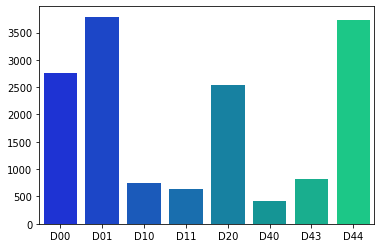

In [ ]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [ ]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Adachi
# of images：1650
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：467
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：254
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：2145
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：1366
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：2032
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

In [ ]:
import cv2
import random
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' +image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

In [ ]:
!pip install matplotlib==1.4

     |████████████████████████████████| 51.2 MB 81 kB/s 
     |████████████████████████████████| 154 kB 66.8 MB/s 
  ERROR: Failed building wheel for matplotlib
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
    Running setup.py install for matplotlib ... error
  Rolling back uninstall of matplotlib
  Moving to /usr/local/lib/python3.7/dist-packages/__pycache__/pylab.cpython-37.pyc
   from /tmp/pip-uninstall-c9uchyis/pylab.cpython-37.pyc
  Moving to /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
   from /tmp/pip-uninstall-dnlm3_lg/matplotlib-3.2.2-py3.7-nspkg.pth
  Moving to /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~atplotlib-3.2.2.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/matplotlib.li

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as matplot

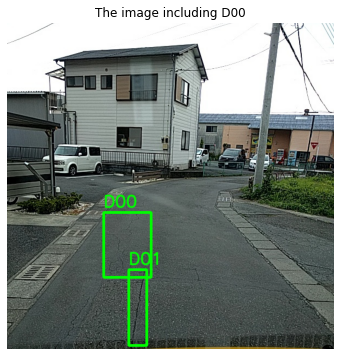

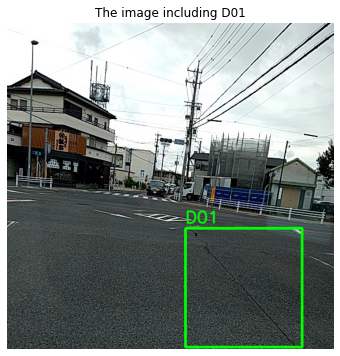

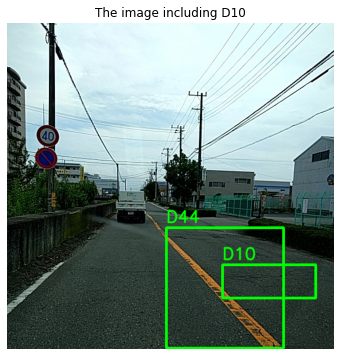

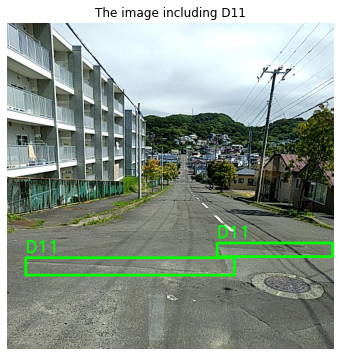

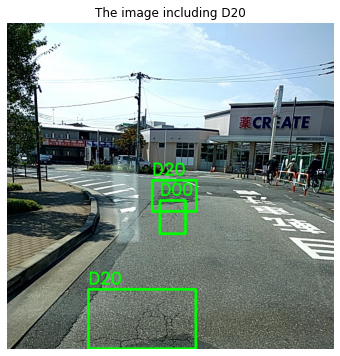

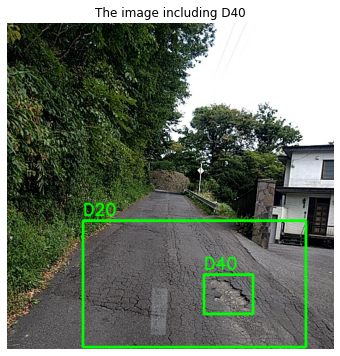

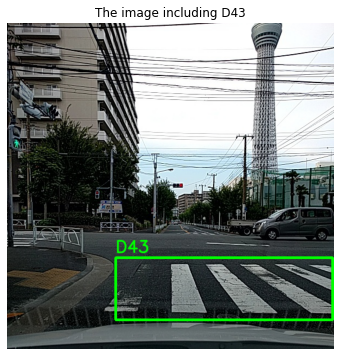

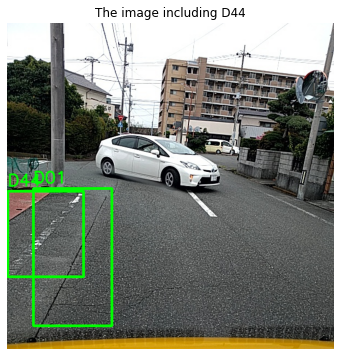

In [ ]:
import tensorflow as tf
for damageType in damageTypes:
    tmp = []
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')

        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
        
        
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp[0:1]):
        img = draw_images(image)
        plt.subplot(1,1,number+1)
        plt.axis('off')
        plt.title('The image including ' + damageType)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))